In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
movies = pd.read_csv('./data/2/movies_cleaned.csv') 
recommendation = pd.read_csv('./data/2/recommendation_cleaned.csv') # uesr_id Í∞úÏàò
reviews = pd.read_csv('./data/2/reviews_cleaned.csv') # user_id Í∞úÏàò
search = pd.read_csv('./data/2/search_cleaned.csv') # user_id Í∞úÏàò
users = pd.read_csv('./data/2/users_cleaned.csv') # Î©îÏù∏
watch = pd.read_csv('./data/2/watch_cleaned.csv') # user_id Í∞úÏàò

## Ïª¨Îüº Î∂ÑÎ•ò

In [3]:
# movies
movies_numeric = ['release_year', 'duration_minutes', 'imdb_rating']
movies_categorical = ['movie_id', 'title', 'content_type', 'genre_primary', 'rating', 'language', 'country_of_origin', 'added_to_platform']
movies_boolean = ['is_netflix_original', 'content_warning']

# recommendation
recommendation_numeric = ['position_in_list']
recommendation_categorical = ['recommendation_id', 'user_id', 'movie_id', 'recommendation_date', 'recommendation_type', 'device_type', 'time_of_day', 'algorithm_version']
recommendation_boolean = ['was_clicked']

# reviews
reviews_numeric = ['rating', 'helpful_votes', 'total_votes', 'sentiment_score']
reviews_categorical = ['review_id', 'user_id', 'movie_id', 'review_date', 'device_type', 'review_text', 'sentiment']
reviews_boolean = ['is_verified_watch']

# search
search_numeric = ['results_returned', 'search_duration_seconds']
search_categorical = ['search_id', 'user_id', 'search_query', 'search_date', 'device_type', 'location_country']
search_boolean = ['had_typo', 'used_filters']

# users
users_numeric = ['age', 'monthly_spend', 'household_size']
users_categorical = ['user_id', 'email', 'first_name', 'last_name', 'gender', 'country', 'state_province', 'city', 'subscription_plan', 'subscription_start_date', 'primary_device', 'created_at']
users_boolean = ['is_active']

# watch
watch_numeric = ['watch_duration_minutes', 'progress_percentage']
watch_categorical = ['session_id', 'user_id', 'movie_id', 'watch_date', 'device_type', 'action', 'quality', 'location_country']
watch_boolean = ['is_download']

## 1. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© Î∞è Ï†ÑÏ≤òÎ¶¨

In [4]:
# userÏôÄ watch Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
user_watch = pd.merge(users, watch, on='user_id', how='inner')

# user_watchÏôÄ movies Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = pd.merge(user_watch, movies, on='movie_id', how='inner')

# Ïó∞Î†πÎåÄ Ïª¨Îüº Ï∂îÍ∞Ä
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ Ïù¥ÏÉÅ']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

## 2. Ïó∞Î†πÎåÄÎ≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥ Î∂ÑÏÑù

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\3671264720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_genre = merged_df.groupby(['age_group', 'genre_primary'])['movie_id'].count().reset_index()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\3671264720.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_genre_pivot = age_genre.pivot_table(index='age_group', columns='genre_primary', values='movie_id', fill_value=0)


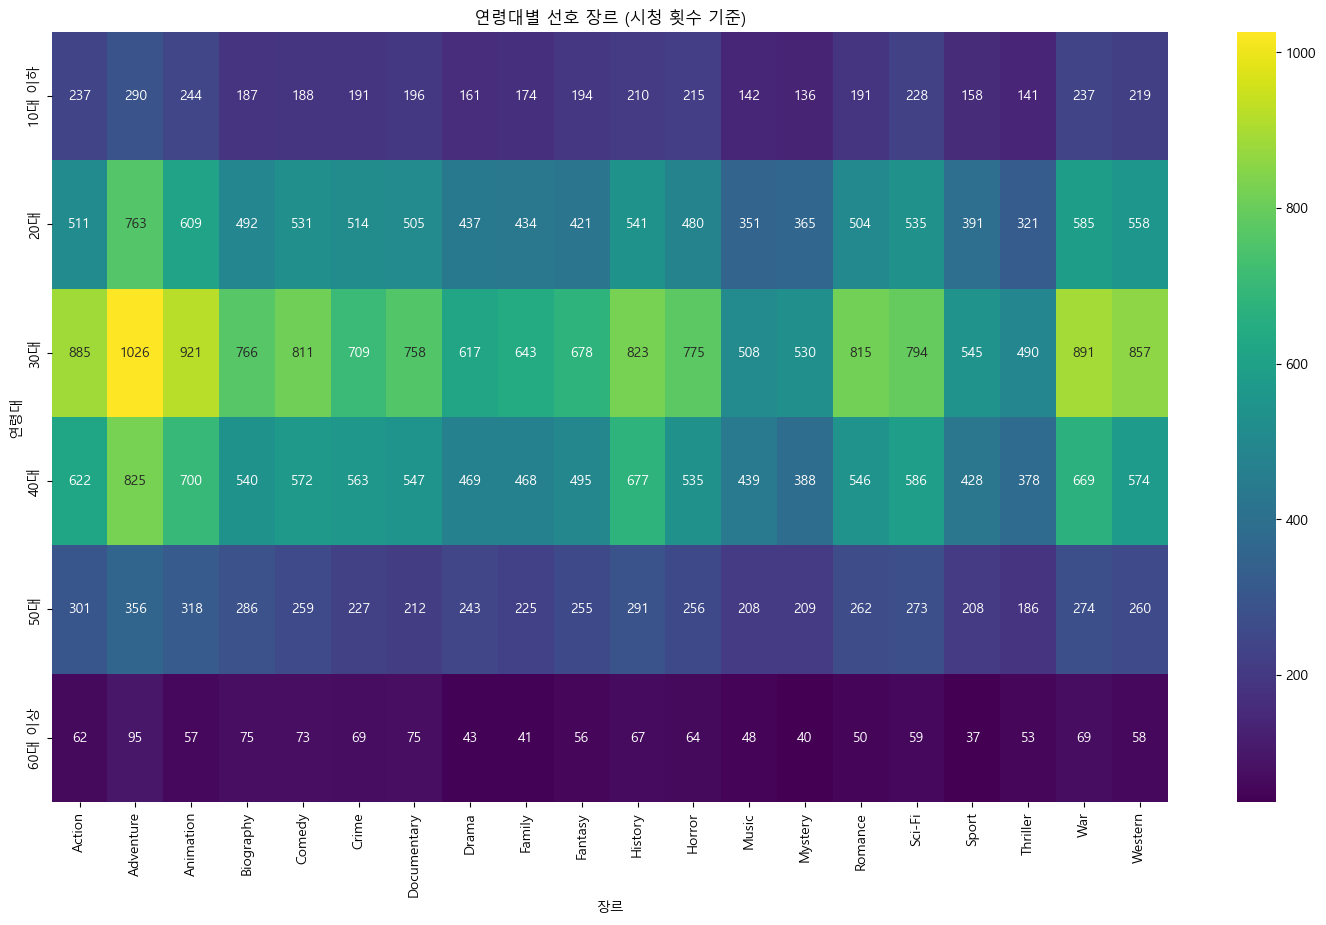

In [5]:
age_genre = merged_df.groupby(['age_group', 'genre_primary'])['movie_id'].count().reset_index()
age_genre_pivot = age_genre.pivot_table(index='age_group', columns='genre_primary', values='movie_id', fill_value=0)

plt.figure(figsize=(18, 10))
sns.heatmap(age_genre_pivot, cmap='viridis', annot=True, fmt='.0f')
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥ (ÏãúÏ≤≠ ÌöüÏàò Í∏∞Ï§Ä)')
plt.xlabel('Ïû•Î•¥')
plt.ylabel('Ïó∞Î†πÎåÄ')
plt.show()

## 3. Ïó∞Î†πÎåÄÎ≥Ñ ÏõîÍ∞Ñ ÏßÄÏ∂úÏï° Î∞è Íµ¨ÎèÖ ÏöîÍ∏àÏ†ú Î∂ÑÏÑù

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1148916330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='monthly_spend', data=users, palette='pastel')


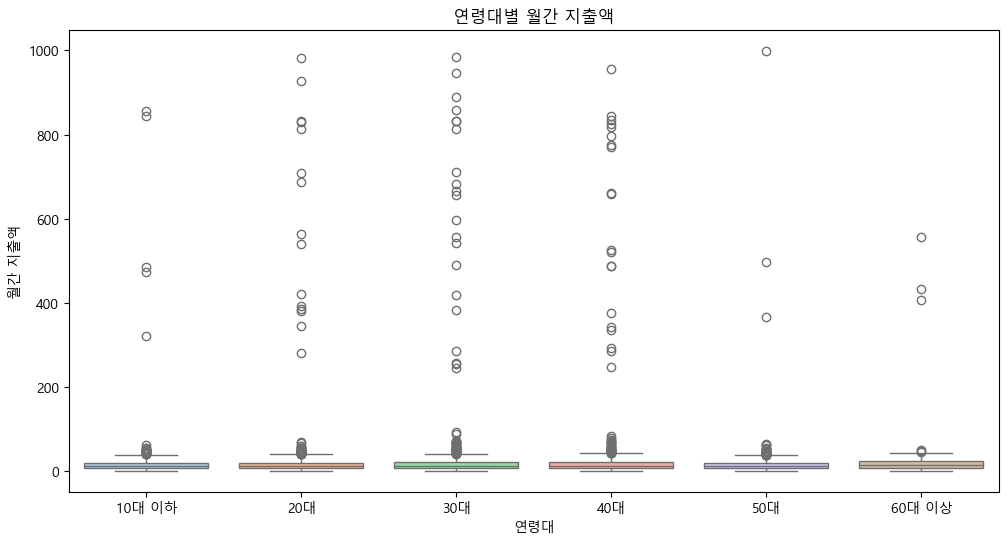

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='monthly_spend', data=users, palette='pastel')
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ ÏõîÍ∞Ñ ÏßÄÏ∂úÏï°')
plt.xlabel('Ïó∞Î†πÎåÄ')
plt.ylabel('ÏõîÍ∞Ñ ÏßÄÏ∂úÏï°')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1927582577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subscription = users.groupby(['age_group', 'subscription_plan'])['user_id'].count().unstack().fillna(0)


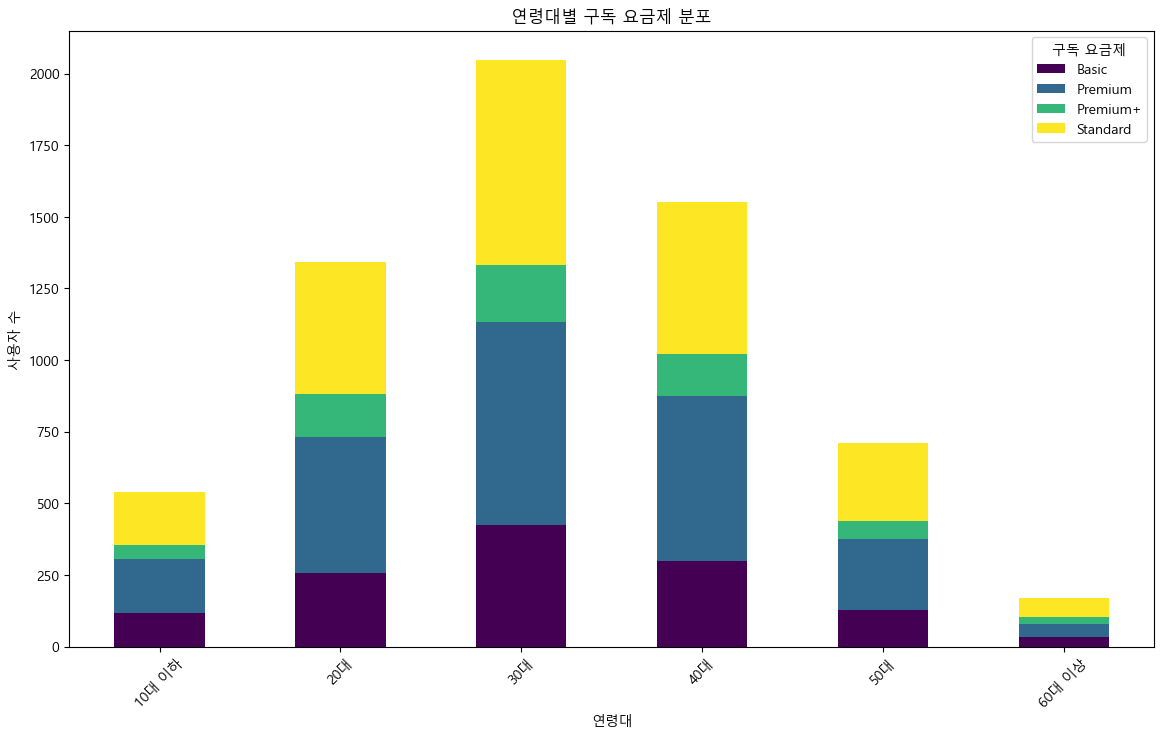

In [7]:
age_subscription = users.groupby(['age_group', 'subscription_plan'])['user_id'].count().unstack().fillna(0)

age_subscription.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ Íµ¨ÎèÖ ÏöîÍ∏àÏ†ú Î∂ÑÌè¨')
plt.xlabel('Ïó∞Î†πÎåÄ')
plt.ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
plt.xticks(rotation=45)
plt.legend(title='Íµ¨ÎèÖ ÏöîÍ∏àÏ†ú')
plt.show()

## 4. Ïó∞Î†πÎåÄÎ≥Ñ ÏãúÏ≤≠ ÌñâÌÉú Î∂ÑÏÑù

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\2986442292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='watch_duration_minutes', data=merged_df, palette='coolwarm', showfliers=False) # Ïù¥ÏÉÅÏπò Ï†úÏô∏


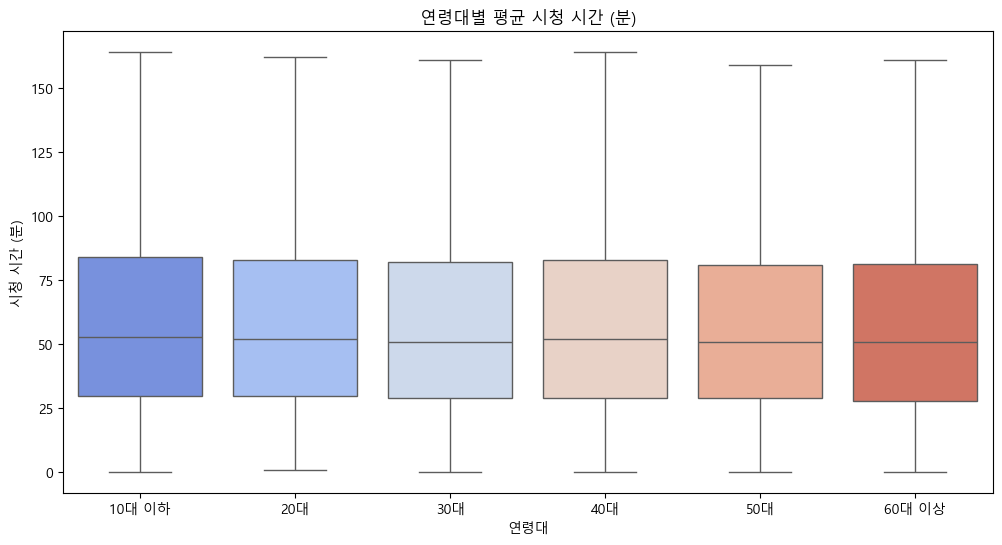

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='watch_duration_minutes', data=merged_df, palette='coolwarm', showfliers=False) # Ïù¥ÏÉÅÏπò Ï†úÏô∏
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ ÌèâÍ∑† ÏãúÏ≤≠ ÏãúÍ∞Ñ (Î∂Ñ)')
plt.xlabel('Ïó∞Î†πÎåÄ')
plt.ylabel('ÏãúÏ≤≠ ÏãúÍ∞Ñ (Î∂Ñ)')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\2666018185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='progress_percentage', data=merged_df, palette='magma', showfliers=False) # Ïù¥ÏÉÅÏπò Ï†úÏô∏


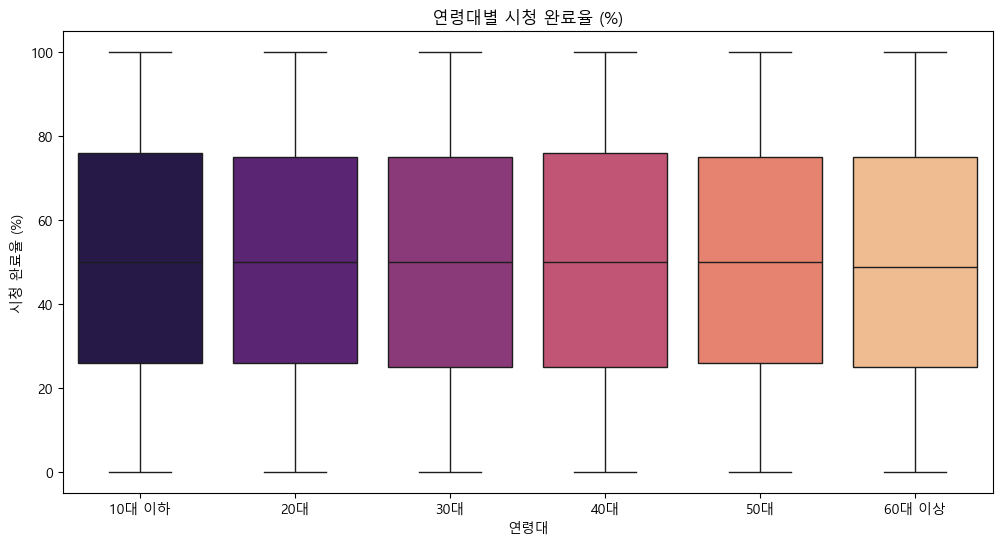

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='progress_percentage', data=merged_df, palette='magma', showfliers=False) # Ïù¥ÏÉÅÏπò Ï†úÏô∏
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ ÏãúÏ≤≠ ÏôÑÎ£åÏú® (%)')
plt.xlabel('Ïó∞Î†πÎåÄ')
plt.ylabel('ÏãúÏ≤≠ ÏôÑÎ£åÏú® (%)')
plt.show()

## 5. Ïó∞Î†πÎåÄÎ≥Ñ Ï£ºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í∏∞Í∏∞ Î∂ÑÏÑù

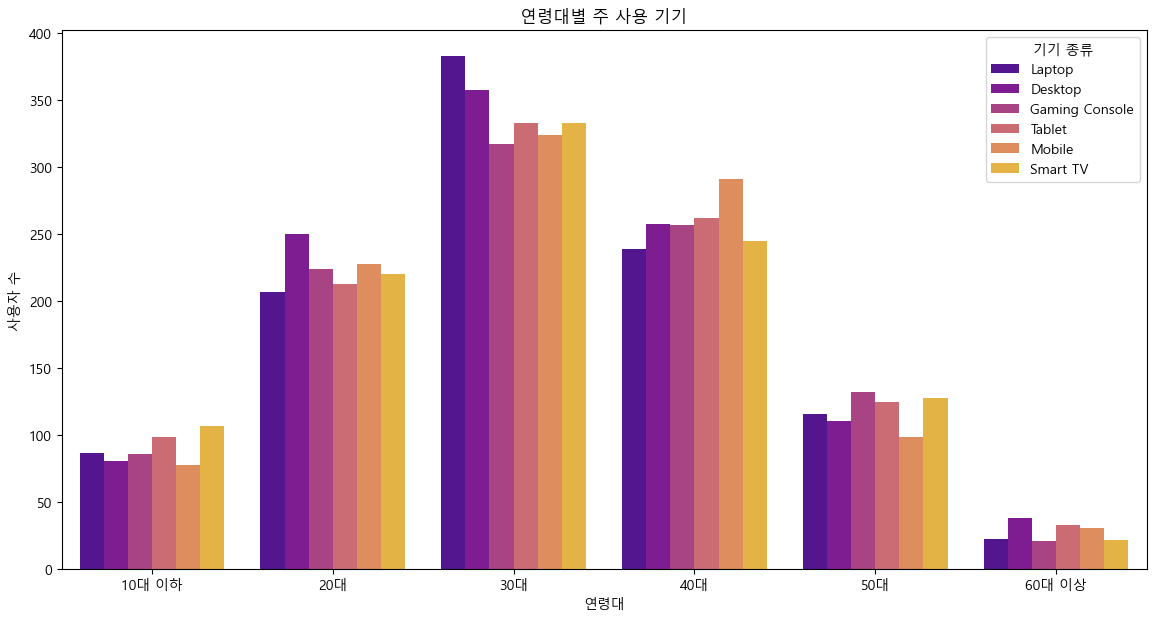

In [10]:
plt.figure(figsize=(14, 7))
sns.countplot(x='age_group', hue='primary_device', data=users, palette='plasma')
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ Ï£º ÏÇ¨Ïö© Í∏∞Í∏∞')
plt.xlabel('Ïó∞Î†πÎåÄ')
plt.ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
plt.legend(title='Í∏∞Í∏∞ Ï¢ÖÎ•ò')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1756170954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_plan.index, y=churn_by_plan.values, palette='viridis')


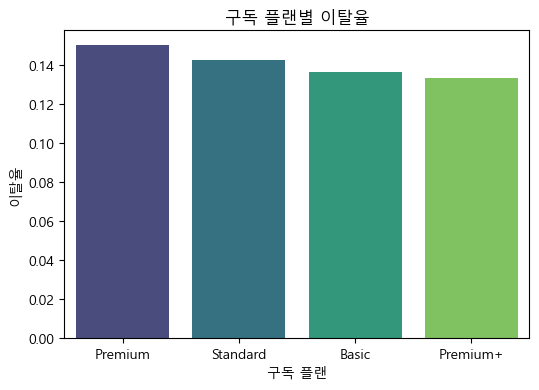

In [11]:
# --- ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(6, 4))
churn_by_plan = 1 - users.groupby('subscription_plan')['is_active'].mean().sort_values()
ax = sns.barplot(x=churn_by_plan.index, y=churn_by_plan.values, palette='viridis')
ax.set_title('Íµ¨ÎèÖ ÌîåÎûúÎ≥Ñ Ïù¥ÌÉàÏú®')
ax.set_xlabel('Íµ¨ÎèÖ ÌîåÎûú')
ax.set_ylabel('Ïù¥ÌÉàÏú®')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1866798078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_device.index, y=churn_by_device.values, palette='magma')


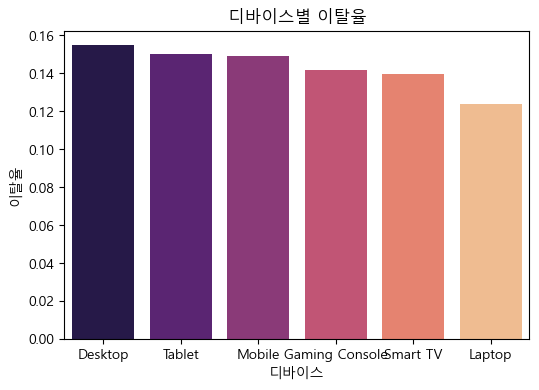

In [12]:
# --- ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(6, 4))
churn_by_device = 1 - users.groupby('primary_device')['is_active'].mean().sort_values()
ax = sns.barplot(x=churn_by_device.index, y=churn_by_device.values, palette='magma')
ax.set_title('ÎîîÎ∞îÏù¥Ïä§Î≥Ñ Ïù¥ÌÉàÏú®')
ax.set_xlabel('ÎîîÎ∞îÏù¥Ïä§')
ax.set_ylabel('Ïù¥ÌÉàÏú®')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\2014776272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_age.index, y=churn_by_age.values, palette='coolwarm')


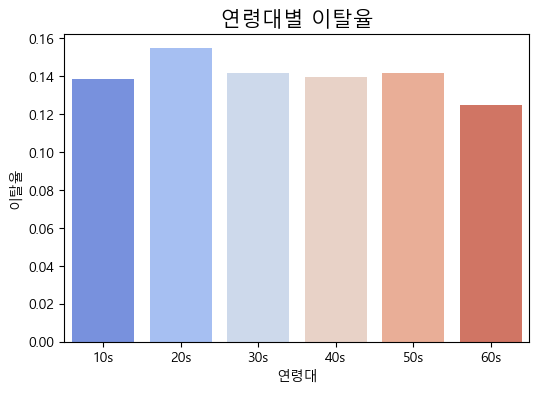

In [13]:
# --- ÏãúÍ∞ÅÌôî ---
# ÎÇòÏù¥Î•º 10ÏÑ∏ Îã®ÏúÑ Í∑∏Î£πÏúºÎ°ú Î≥ÄÌôò
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10s', '20s', '30s', '40s', '50s', '60s']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(6, 4))
# FutureWarningÎ•º Î¨¥ÏãúÌïòÍ≥† Í≥ÑÏÇ∞
churn_by_age = 1 - users.groupby('age_group', observed=False)['is_active'].mean()
ax = sns.barplot(x=churn_by_age.index, y=churn_by_age.values, palette='coolwarm')
ax.set_title('Ïó∞Î†πÎåÄÎ≥Ñ Ïù¥ÌÉàÏú®', fontsize=15)
ax.set_xlabel('Ïó∞Î†πÎåÄ')
ax.set_ylabel('Ïù¥ÌÉàÏú®')
plt.show()

[LightGBM] [Info] Number of positive: 3817, number of negative: 3817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7557
[LightGBM] [Info] Number of data points in the train set: 7634, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.25      0.00      0.01       274
           1       0.86      1.00      0.92      1636

    accuracy                           0.86      1910
   macro avg       0.55      0.50      0.46      1910
weighted avg       0.77      0.86      0.79      1910



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


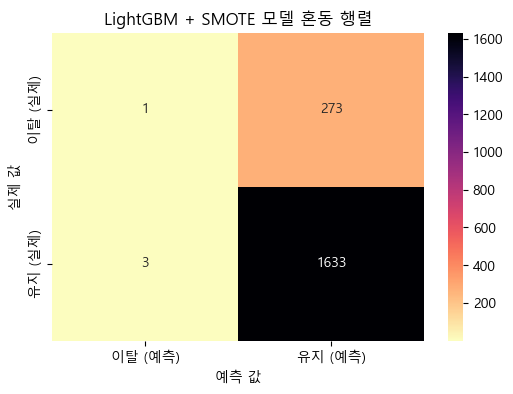


Î™®Îç∏Ïù¥ './model_output\activity_lgbm_smote_pipeline.pkl' Í≤ΩÎ°úÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

--- Ï†ÄÏû•Îêú Î™®Îç∏Î°ú Îã§Ïãú ÏòàÏ∏°Ìïú Í≤∞Í≥º ---


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# imblearn ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # sklearnÏùò PipelineÍ≥º Íµ¨Î∂Ñ

# Î™®Îç∏
from lightgbm import LGBMClassifier

# 2. ÌäπÏÑ± Í≥µÌïô (Feature Engineering)

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÌôúÎèô ÌöüÏàò Í≥ÑÏÇ∞
watch_counts = watch.groupby('user_id').size().reset_index(name='watch_count')
rec_counts = recommendation.groupby('user_id').size().reset_index(name='recommendation_count')
rev_counts = reviews.groupby('user_id').size().reset_index(name='review_count')
search_counts = search.groupby('user_id').size().reset_index(name='search_count')

# users Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÌôúÎèô ÌöüÏàò Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (left join)
merged_df = pd.merge(users, watch_counts, on='user_id', how='left')
merged_df = pd.merge(merged_df, rec_counts, on='user_id', how='left')
merged_df = pd.merge(merged_df, rev_counts, on='user_id', how='left')
merged_df = pd.merge(merged_df, search_counts, on='user_id', how='left')

# left joinÏúºÎ°ú ÏÉùÍ∏¥ NaN Í∞íÏùÑ 0ÏúºÎ°ú Ï±ÑÏõÄ (ÌöüÏàòÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞)
# TypeError Î∞©ÏßÄÎ•º ÏúÑÌï¥ Ïà´ÏûêÌòï count Ïó¥Îì§Îßå ÏÑ†ÌÉùÌïòÏó¨ Ï±ÑÏõÅÎãàÎã§.
count_cols = ['watch_count', 'recommendation_count', 'review_count', 'search_count']
merged_df[count_cols] = merged_df[count_cols].fillna(0)


# 3. Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

# ÌÉÄÍ≤ü(y)Í≥º ÌîºÏ≤ò(X) Î∂ÑÎ¶¨
y = merged_df['is_active'].astype(int)
X = merged_df.drop(['is_active', 'user_id', 'email', 'first_name', 'last_name', 'subscription_start_date', 'created_at'], axis=1)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (stratify=y ÏòµÏÖòÏúºÎ°ú ÌÉÄÍ≤ü ÎπÑÏú® Ïú†ÏßÄ)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 4. Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï

# Ïà´ÏûêÌòïÍ≥º Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏûêÎèô Î∂ÑÎ•ò (ValueError Î∞©ÏßÄ)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∏∞ (Ïä§ÏºÄÏùºÎßÅ Î∞è Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# LightGBM Î™®Îç∏ Ï†ïÏùò (class_weight='balanced'Î°ú Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨)
model = LGBMClassifier(random_state=42, class_weight='balanced')

# imblearn ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï (Ï†ÑÏ≤òÎ¶¨Í∏∞ -> SMOTE -> Î™®Îç∏)
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Ïò§Î≤ÑÏÉòÌîåÎßÅ
    ('classifier', model)
])


# 5. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
pipeline.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma_r',
            xticklabels=['Ïù¥ÌÉà (ÏòàÏ∏°)', 'Ïú†ÏßÄ (ÏòàÏ∏°)'],
            yticklabels=['Ïù¥ÌÉà (Ïã§Ï†ú)', 'Ïú†ÏßÄ (Ïã§Ï†ú)'])
plt.title('LightGBM + SMOTE Î™®Îç∏ ÌòºÎèô ÌñâÎ†¨')
plt.ylabel('Ïã§Ï†ú Í∞í')
plt.xlabel('ÏòàÏ∏° Í∞í')
plt.show()


# 6. ÌïôÏäµÎêú Î™®Îç∏ Ï†ÄÏû•
output_dir = './model_output'
os.makedirs(output_dir, exist_ok=True)

pipeline_path = os.path.join(output_dir, 'activity_lgbm_smote_pipeline.pkl')
with open(pipeline_path, 'wb') as f:
    pickle.dump(pipeline, f)

print(f"\nÎ™®Îç∏Ïù¥ '{pipeline_path}' Í≤ΩÎ°úÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


# 7. Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎìú ÌõÑ ÏòàÏ∏°
with open(pipeline_path, 'rb') as f:
    loaded_pipeline = pickle.load(f)

loaded_pred = loaded_pipeline.predict(X_test)
print("\n--- Ï†ÄÏû•Îêú Î™®Îç∏Î°ú Îã§Ïãú ÏòàÏ∏°Ìïú Í≤∞Í≥º ---")

In [ ]:
print(y_test)

3210    1
1621    1
5411    1
2514    1
6254    1
       ..
610     1
2432    1
4313    1
2036    1
683     1
Name: is_active, Length: 1910, dtype: int64


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ---
# ÏÇ¨Ïö©ÌïòÏã† .ipynb ÌååÏùº ÎÇ¥ ÏΩîÎìúÏóê Îî∞Î•¥Î©¥, 'users_cleaned.csv' ÌååÏùºÏù¥ ÏÇ¨Ïö©Ïûê Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏäµÎãàÎã§.
# Ïù¥ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º Ï†ïÌôïÌïòÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÏÖîÏïº Ìï©ÎãàÎã§.
try:
    df = pd.read_csv('./data/2/users_cleaned.csv')
except FileNotFoundError:
    print("Ïò§Î•ò: 'users_cleaned.csv' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    # ÌååÏùºÏù¥ ÏóÜÏùÑ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥ ÏòàÏãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df = pd.DataFrame({'is_active': [True]*895 + [False]*105})

# --- 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# 'is_active' Í∞í(True/False)Ïóê Îî∞Îùº Î†àÏù¥Î∏îÏùÑ 'ÌôúÏÑ±'/'ÎπÑÌôúÏÑ±(Ïù¥ÌÉà)'Î°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
df['status'] = df['is_active'].apply(lambda x: 'ÌôúÏÑ±' if x else 'ÎπÑÌôúÏÑ±(Ïù¥ÌÉà)')

# ÏÉÅÌÉúÎ≥Ñ ÏÇ¨Ïö©Ïûê ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
status_counts = df['status'].value_counts()
labels = status_counts.index
values = status_counts.values

# --- 3. ÎèÑÎÑõ Ï∞®Ìä∏ ÏÉùÏÑ± ---
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=.6,  # ÎèÑÎÑõÏùò Ï§ëÍ∞Ñ Íµ¨Î©ç ÌÅ¨Í∏∞ Ï°∞Ï†à
    textinfo='label+percent',
    insidetextorientation='radial'
)])

# --- 4. Ï∞®Ìä∏ Î†àÏù¥ÏïÑÏõÉ ÏÑ§Ï†ï ---
fig.update_layout(
    title_text='üíî Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÌôúÏÑ±/ÎπÑÌôúÏÑ± ÎπÑÏú®',
    title_x=0.5, # Ï†úÎ™© Ï§ëÏïô Ï†ïÎ†¨
    legend_title_text='ÏÉÅÌÉú'
)

# --- 5. Ï∞®Ìä∏ ÌëúÏãú ---
fig.show()
